# Imports

In [2]:
from numpy.random import seed
seed(800)
# tf.random.set_seed(404) 

In [3]:
import tensorflow as tf
import os
import numpy as np

import keras
from keras.datasets import cifar10  # calling the data
from keras.models import Sequential
from keras.layers import Dense,Activation, Dropout
from keras.callbacks import TensorBoard

from time import strftime
from IPython.display import display # this help to display the images 
from keras.preprocessing.image import array_to_img # this help to convert the array into img
import matplotlib.pyplot as plt


%matplotlib inline

# Constants

In [4]:
# tensborad ko lai folder name 
LOG_DIR = 'tensorboard_cifar_logs/'

label_Names = ['Plan','Car','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']
IMAGE_WIDTH = 32
IMAGE_HEIGHT = 32
IMAGE_PIXELS = IMAGE_WIDTH * IMAGE_HEIGHT
COLOR_CHANNELS = 3
TOTAL_INPUTS = IMAGE_PIXELS * COLOR_CHANNELS 
VALIDATION_SIZE = 10000
SMALL_TRAIN_SIZE = 1000

# Get the Data

In [5]:
(x_train_all, y_train_all),(x_test, y_test) =  cifar10.load_data()

In [6]:
type(cifar10)

module

In [7]:
type(x_train_all)

numpy.ndarray

# Explore the Data

In [8]:
x_train_all[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

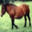

In [9]:
pic = array_to_img(x_train_all[7])
display(pic)

In [10]:
y_train_all.shape

(50000, 1)

In [11]:
y_train_all[7][0]

7

In [12]:
label_Names[y_train_all[7][0]]

'Horse'

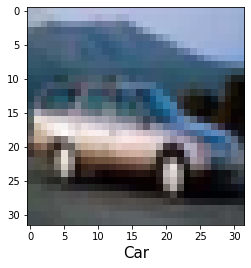

In [13]:
plt.imshow(x_train_all[4])
plt.xlabel(label_Names[y_train_all[4][0]],fontsize = 15)
plt.show()

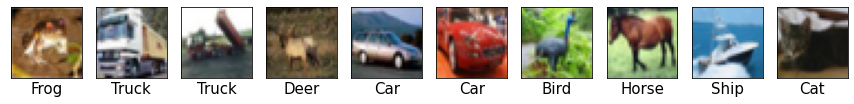

In [14]:
plt.figure(figsize=[15,5])
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(x_train_all[i])
    plt.xlabel(label_Names[y_train_all[i][0]],fontsize = 15)
    plt.xticks([])
    plt.yticks([])


In [15]:
x_train_all.shape

(50000, 32, 32, 3)

In [16]:
nr_images,x,y,c = x_train_all.shape

In [17]:
print(f'images = {nr_images} \t | width = {x} \t | height ={y} \t | Color Channel ={c}')

images = 50000 	 | width = 32 	 | height =32 	 | Color Channel =3


In [18]:
x_test.shape

(10000, 32, 32, 3)

# Preprocess Data

In [19]:
type(x_train_all[0][0][0][0])

numpy.uint8

In [20]:
x_train_all,x_test = x_train_all/255.0, x_test / 255.0

In [21]:
x_train_all[0][0][0][0]

0.23137254901960785

In [22]:
type(x_train_all[0][0][0][0])

numpy.float64

In [23]:
x_train_all = x_train_all.reshape(x_train_all.shape[0], TOTAL_INPUTS)

In [24]:
x_train_all.shape

(50000, 3072)

In [25]:
x_test = x_test.reshape(len(x_test), TOTAL_INPUTS)

In [26]:
print(f'shape of x_test is {x_test.shape}')

shape of x_test is (10000, 3072)


### create validation Dataset

In [27]:
x_val = x_train_all[:VALIDATION_SIZE]

In [28]:
y_val = y_train_all[:VALIDATION_SIZE]

In [29]:
x_val.shape

(10000, 3072)

**Challenge:** Create two numpy arrays ```x_train``` and ```y_train``` that have the shape (40000, 3072) and (40000, 1) respectively. They need to contain the last 40000 values from ```x_train_all``` and ```y_train_all``` respectively. 

In [30]:
x_train = x_train_all[VALIDATION_SIZE:]
y_train = y_train_all[VALIDATION_SIZE:]

In [31]:
y_train.shape

(40000, 1)

### Create a small dataset (for illustration)


In [32]:
x_train_xs = x_train[:SMALL_TRAIN_SIZE]
y_train_xs = y_train[:SMALL_TRAIN_SIZE]

# Define the neural network using keras

In [47]:
model_1 = Sequential([
    Dense(units=128, input_dim = TOTAL_INPUTS, activation='relu', name = 'm1_hidden1'),
    Dense(units=64, activation = 'relu',name = 'm1_hidden2'),
    Dense(16, activation = 'relu',name = 'm1_hidden3'),
    Dense(10, activation='softmax',name = 'm1_output')
])
model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [48]:
type(model_1)

tensorflow.python.keras.engine.sequential.Sequential

In [49]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
m1_hidden1 (Dense)           (None, 128)               393344    
_________________________________________________________________
m1_hidden2 (Dense)           (None, 64)                8256      
_________________________________________________________________
m1_hidden3 (Dense)           (None, 16)                1040      
_________________________________________________________________
m1_output (Dense)            (None, 10)                170       
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
_________________________________________________________________


In [50]:
model_2 = Sequential()
model_2.add(Dropout(0.2, seed=42,input_shape=(TOTAL_INPUTS,)))
model_2.add(Dense(128,activation='relu',name='m2_hidden1'))
model_2.add(Dense(64,activation='relu',name='m2_hidden2'))
model_2.add(Dense(16,activation='relu',name='m2_hidden3'))
model_2.add(Dense(10,activation='softmax',name='m2_output'))
model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

**Challenge:** Create a third model, ```model_3``` that has two dropout layers. The second dropout layer should be added after the first hidden layer and have a dropout rate of 25%. 

In [51]:
model_3 = Sequential()
model_3.add(Dropout(0.2, seed=42,input_shape=(TOTAL_INPUTS,)))
model_3.add(Dense(128,activation='relu',name='m2_hidden1'))
model_3.add(Dense(64,activation='relu',name='m2_hidden2'))
model_3.add(Dropout(0.25, seed=42))
model_3.add(Dense(16,activation='relu',name='m2_hidden3'))
model_3.add(Dense(10,activation='softmax',name='m2_output'))
model_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [52]:
TOTAL_INPUTS

3072

In [53]:
32*32*3*128+128

393344

In [38]:
128*64+64  #128 tei inputs, 64 neurans, 64 bias 

8256

In [39]:
64*16+16

1040

In [40]:
16*10+10

170

In [41]:
32*32*3*128+128 + (128*64+64) + (64*16+16) + (16*10+10) # total params 

402810

# Tensorboard (visualising Learning)

In [42]:
def get_tensorboard(model_name):

    folder_name = f'{model_name} at {strftime("%H %M")}'
    dir_paths = os.path.join(LOG_DIR, folder_name)

    try:
        os.makedirs(dir_paths)
    except OSError as err:
        print(err.strerror)
    else:
        print('Successfully created directory')

    return TensorBoard(log_dir=dir_paths)

# Fit the Model

In [43]:
samples_per_batch = 1000

In [44]:
# %%time
# nr_epochs = 150 
# model_1.fit(x_train_xs,y_train_xs, batch_size=samples_per_batch, epochs=nr_epochs, callbacks=[get_tensorboard('model 1')], 
#             verbose=0,validation_data=(x_val, y_val))

Successfully created directory
Wall time: 45.2 s


In [46]:
# %%time
# nr_epochs = 150 
# model_2.fit(x_train_xs,y_train_xs, batch_size=samples_per_batch, epochs=nr_epochs, callbacks=[get_tensorboard('model 2')], 
#             verbose=0,validation_data=(x_val, y_val))

Successfully created directory
Wall time: 47.1 s


In [54]:
%%time
nr_epochs = 100 
model_1.fit(x_train,y_train, batch_size=samples_per_batch, epochs=nr_epochs, callbacks=[get_tensorboard('model 1 XL')], 
            verbose=0,validation_data=(x_val, y_val))

Successfully created directory
Wall time: 2min 48s


In [55]:
%%time
nr_epochs = 100 
model_2.fit(x_train,y_train, batch_size=samples_per_batch, epochs=nr_epochs, callbacks=[get_tensorboard('model 2 XL')], 
            verbose=0,validation_data=(x_val, y_val))

Successfully created directory
Wall time: 7min 20s


In [56]:
%%time
nr_epochs = 100 
model_3.fit(x_train,y_train, batch_size=samples_per_batch, epochs=nr_epochs, callbacks=[get_tensorboard('model 3 XL')], 
            verbose=0,validation_data=(x_val, y_val))

Successfully created directory
Wall time: 7min 49s
